# Iterate Upon a Model

> Models Available For This Project To Play With Locally

In [ ]:
#| hide
from nbdev.showdoc import *

## Overview 

One of the more things that many data scientist or MLEs like to do is to be able to dive a little deeper into the model itself when training not just when the model is done and saved as an artifact.

There will be a post analysis model verification tutorial that will have examples of how to use SHAP and how to do some post analysis work that is usually pretty interesting work. The future of post analysis work is extremely awesome and when getting a template approach like this out this will allow us to build additional functionality while building more models to use. A quick example of what this template could be used for is the ask of the business to begin to dig a little deeper into the possibility of these models asking will a guest buy a pass in the next three years.

This would mean we would need a new feature set, more thought worthy base query for eligible guest to build upon, and a new call to our dependent variable for BOUGHTPASS to push out to three years. This structure wouldn't need to change to this point and we would quickly iterate to see if we can get a model that can predict that question.

Obviously, there is more to it than that and the post analysis work would be much more rigorous as this would be a net new model not something that has performed well over the past couple of years.


**What we will accomplish**:

1. Pulling data from your experiment data creation.

2. Train your model using one of the models of your choice from your library.

3. Having the ability to use your model locally for your desired way of evaluating.

> There are so many repos inside of [Gitlab Vail Resorts](https://gitlab.com/VailResorts) that have so many different types of analysis approaches that the section on desired way of evaluating that if you need a spark go there and look around in the notebooks there is amazing work there.

> **Warning**: this is a draft to get something out that is something that gets the majority of a project work flow that exists right now 

## Create Data From `data_creation` Script

This will create your data for your training set this can take some time depending on your query.

Below is the output of what it would look like if you were to call the data creati

In [ ]:
# |skip
# ! data_creation  --train_or_inference "TRAINING" --experiment_name "BASELINE"

/Users/jeremydemlow/miniforge3/envs/ltbp/lib/python3.9/site-packages/snowflake/connector/options.py:96: UserWarning: You have an incompatible version of 'pyarrow' installed (6.0.0), please install a version that adheres to: 'pyarrow<8.1.0,>=8.0.0; extra == "pandas"'
  warn_incompatible_dep(
INFO:root:This is a production run
INFO:root:Loading Yaml Files..
INFO:root:Generating Feature Set Query
INFO:root:static features in data set: 
 ['DESTINATIONGEOAFINITYLABEL', 'GenderCode']
INFO:root:temporal features in data set: 
 ['Age', 'AvgVisitPerSeason', 'BoughtPass', 'EverCorePass', 'EverPass', 'GuestBehavior', 'IsEpicMixActivated', 'MarketingZone', 'MostCommonTicketComp', 'MostSubSeasonVisited', 'MostVisitedRegion', 'MostVisitedResort', 'OnlySingleResortKey', 'PartnerResortScannerFlag', 'ResortsVisited', 'SkierabilityLabel', 'SubSeasonsPerYear', 'TotalSeasonsScanned', 'TotalVisits', 'VisitMostInPeak']
INFO:root:Appending static feature DESTINATIONGEOAFINITYLABEL to query
INFO:root:Appendin

INFO:data_system_utilities.azure.storage:number of files in container path recursively 32


In [ ]:
# |skip
# ! data_creation  --train_or_inference 'INFERENCE' --experiment_name 'BASELINE'

/Users/jeremydemlow/miniforge3/envs/ltbp/lib/python3.9/site-packages/snowflake/connector/options.py:96: UserWarning: You have an incompatible version of 'pyarrow' installed (6.0.0), please install a version that adheres to: 'pyarrow<8.1.0,>=8.0.0; extra == "pandas"'
  warn_incompatible_dep(
INFO:root:This is a production run
INFO:root:Loading Yaml Files..
INFO:root:Generating Feature Set Query
INFO:root:static features in data set: 
 ['DESTINATIONGEOAFINITYLABEL', 'GenderCode']
INFO:root:temporal features in data set: 
 ['Age', 'AvgVisitPerSeason', 'BoughtPass', 'EverCorePass', 'EverPass', 'GuestBehavior', 'IsEpicMixActivated', 'MarketingZone', 'MostCommonTicketComp', 'MostSubSeasonVisited', 'MostVisitedRegion', 'MostVisitedResort', 'OnlySingleResortKey', 'PartnerResortScannerFlag', 'ResortsVisited', 'SkierabilityLabel', 'SubSeasonsPerYear', 'TotalSeasonsScanned', 'TotalVisits', 'VisitMostInPeak']
INFO:root:Appending static feature DESTINATIONGEOAFINITYLABEL to query
INFO:root:Appendin

INFO:data_system_utilities.snowflake.utils:connection to snowflake established...
INFO:data_system_utilities.snowflake.query:executing query
INFO:data_system_utilities.snowflake.query:data loaded from snowflake
INFO:data_system_utilities.snowflake.query:connection to snowflake has been turned off
INFO:root:data has been delivered from sf to adls


## Grab Data From Experiment 

In [ ]:
from LTBP.data.utils import snowflake_query, get_yaml_dicts

from LTBP.modeling.utils import (
    create_stage_and_query_stage_sf, create_sklearn_preprocess_baseline_dict,
    return_list_of_vars, prepare_training_set, save_sklearn_object_to_data_lake
)

import logging

/Users/jeremydemlow/miniforge3/envs/ltbp/lib/python3.9/site-packages/snowflake/connector/options.py:96: UserWarning: You have an incompatible version of 'pyarrow' installed (6.0.0), please install a version that adheres to: 'pyarrow<8.1.0,>=8.0.0; extra == "pandas"'
  warn_incompatible_dep(


In [ ]:
yaml_file_list=['features.yaml', 'udf_inputs.yaml','etl.yaml','models.yaml']
prod_or_dev = 'dev'
experiment_name='BASELINE'
experiment = True # this will trigger if the feature set needs to be created
test_set = True

# Grab all yaml files for current probject
features, udf_inputs, etl_dict, models_dict = get_yaml_dicts(yaml_file_list)

# Create Snowflake Stage and Query Experiment location or commit location and return training data
sf = snowflake_query(sfSchema=prod_or_dev if prod_or_dev.lower() == 'dev' else 'LTBP')
df_train = create_stage_and_query_stage_sf(
    sf=sf,
    etl=etl_dict,
    udf_inputs=udf_inputs,
    train_or_inference='TRAINING',
    experiment_name=experiment_name,
    experiment=experiment,
    indentification=models_dict['idenfication']
    )
logging.info(f'size of test set {df_train.shape}')
df_train.head(2)

INFO:data_system_utilities.snowflake.utils:stage_query: 
 create or replace stage ltbpFY23LocalRunTest
url='azure://vaildtscadls.blob.core.windows.net/vailadls/projects/LTBP/FY23/experiments/BASELINE'
credentials=(azure_sas_token='**MASKED**')
encryption=(type= 'NONE')
file_format = (type = parquet        )
INFO:data_system_utilities.snowflake.utils:connection to snowflake established...
INFO:data_system_utilities.snowflake.query:executing query
INFO:data_system_utilities.snowflake.query:data loaded from snowflake
INFO:data_system_utilities.snowflake.query:connection to snowflake has been turned off
INFO:data_system_utilities.snowflake.query:Stage area LTBPFY23LOCALRUNTEST successfully created.
INFO:root:adls snowflake stage query 
    select
    $1:"ECID"::varchar as ECID
, $1:"SEASONYEAR"::varchar as SEASONYEAR
, $1:"AGE"::varchar as AGE
, $1:"AVGVISITPERSEASON"::varchar as AVGVISITPERSEASON
, $1:"BOUGHTPASS"::varchar as BOUGHTPASS
, $1:"DESTINATIONGEOAFINITYLABEL"::varchar as DESTIN

,ECID,SEASONYEAR,AGE,AVGVISITPERSEASON,BOUGHTPASS,DESTINATIONGEOAFINITYLABEL,EVERCOREPASS,EVERPASS,GENDERCODE,GUESTBEHAVIOR,...,MOSTVISITEDREGION,MOSTVISITEDRESORT,ONLYSINGLERESORTKEY,PARTNERRESORTSCANNERFLAG,RESORTSVISITED,SKIERABILITYLABEL,SUBSEASONSPERYEAR,TOTALSEASONSSCANNED,TOTALVISITS,VISITMOSTINPEAK
0,84723239,2018/19,26,3,0,Destination,0,0,M,None,...,Rocky Mountain,3,3,0,1,None,1,1,3,0
1,85667099,2018/19,8,3,0,International,0,0,M,None,...,Northeast,19,19,0,1,None,1,1,3,1


In [ ]:
from fastcore.script import Param, call_parse

from LTBP.data.utils import snowflake_query, get_yaml_dicts
from LTBP.modeling.utils import (
    create_stage_and_query_stage_sf, create_sklearn_preprocess_baseline_dict,
    return_list_of_vars, prepare_training_set, save_sklearn_object_to_data_lake
)
from LTBP.modeling.custom_utils import evaluate, send_holdout_results_to_sf

from machine_learning_utilities import preprocessing

from machine_learning_utilities.project_log import project_log

from sklearn.pipeline import Pipeline

import LTBP.modeling.models as ds_models
import os
import logging
import json

# Preprocess Training Data

In [ ]:
# Choosing an adls path depending on experiment being true or false
adls_path = os.path.join((os.path.join(etl_dict['data_lake_path'], 'experiments', experiment_name)
    if experiment 
    else os.path.join(etl_dict['data_lake_path'], 
    os.environ.get('CI_COMMIT_SHA', 'LocalRunNBS')))
    , models_dict['preprocessors_adls_path'])

# Grab all Categorical and Continous Variables for Modeling
cat_vars =[{f.upper() : values['transformation'][experiment_name]} for f, values in features.items() 
            if values['var_type'][experiment_name] == 'cat'
            and values['input_definition'] != 'LABEL']
cont_vars =[{f.upper(): values['transformation'][experiment_name]} for f, values in features.items() 
            if values['var_type'][experiment_name] == 'cont'
            and values['input_definition'] != 'LABEL']
y_var=[k.upper() for k, v in features.items() if v['input_definition'] == 'LABEL']

# Create Dictionary and create sklearn preprocessing Pipeline
feature_dict = create_sklearn_preprocess_baseline_dict(cat_vars=cat_vars, 
                                                       cont_vars=cont_vars)
logging.info(feature_dict)
cat_vars = return_list_of_vars(cat_vars)
cont_vars = return_list_of_vars(cont_vars)
logging.info(f"categorical variables: \n {cat_vars}")
logging.info(f"continous variables: \n {cont_vars}")
pipe = preprocessing.generate_sklearn_preprocessing_pipeline(
    feature_dict, impute=True, impute_strategy='mean'
)


# Preprocess and split data set to return neccessary object for modeling
result = prepare_training_set(df_train,
                              y_var=[k.upper() for k, v in features.items() if v['input_definition'] == 'LABEL'],
                              y_scaler_type=models_dict[experiment_name]['y_scaler_type'],
                              adls_path=adls_path,
                              sklearn_pipe=pipe,
                              test_set=test_set,
                              etl_dict=etl_dict,
                              models_dict=models_dict,
                              connection_str=os.environ[models_dict["connection_str"]],
                              experiment_name=experiment_name,
                              as_type=int,
                              identifiers=['ECID', 'SEASONYEAR']
                              )
if test_set:
    X_train, X_valid, X_test, y_train, y_valid, y_test, sklearn_pipe, scaler, id_list = result
else:
    X_train, X_valid, y_train, y_valid, sklearn_pipe, scaler, id_list = result

INFO:root:{'DESTINATIONGEOAFINITYLABEL': {'transformation': {'name': 'OrdinalEncoder', 'args': {'handle_unknown': 'use_encoded_value', 'unknown_value': -1}}, 'variable_type': 'cat'}, 'EVERCOREPASS': {'transformation': {'name': 'OrdinalEncoder', 'args': {'handle_unknown': 'use_encoded_value', 'unknown_value': -1}}, 'variable_type': 'cat'}, 'EVERPASS': {'transformation': {'name': 'OrdinalEncoder', 'args': {'handle_unknown': 'use_encoded_value', 'unknown_value': -1}}, 'variable_type': 'cat'}, 'GENDERCODE': {'transformation': {'name': 'OrdinalEncoder', 'args': {'handle_unknown': 'use_encoded_value', 'unknown_value': -1}}, 'variable_type': 'cat'}, 'GUESTBEHAVIOR': {'transformation': {'name': 'OrdinalEncoder', 'args': {'handle_unknown': 'use_encoded_value', 'unknown_value': -1}}, 'variable_type': 'cat'}, 'ISEPICMIXACTIVATED': {'transformation': {'name': 'OrdinalEncoder', 'args': {'handle_unknown': 'use_encoded_value', 'unknown_value': -1}}, 'variable_type': 'cat'}, 'MARKETINGZONE': {'transfo

INFO:root:Successfully Spilt Data
Train: (24000, 24), (24000, 1)
Valid: (5100, 24), (5100, 1)
Test: (900, 24), (900, 1)
INFO:root:Size of the id_list for the hold set (900, 2)
INFO:root:This project relies on the query to have accurate labels with no preprocessing..
INFO:root:Pushing Sklearn Object to Azure: projects/LTBP/FY23/experiments/BASELINE/preprocessors/LocalRunTeststandard_pipe.pickle
INFO:data_system_utilities.azure.storage:Uploading LocalRunTeststandard_pipe.pickle, to Azure Storage projects/LTBP/FY23/experiments/BASELINE/preprocessors/LocalRunTeststandard_pipe.pickle
INFO:data_system_utilities.azure.storage:Azure Upload Complete
INFO:root:LocalRunTeststandard_pipe.pickle successfully pushed to projects/LTBP/FY23/experiments/BASELINE/preprocessors/


## Training Model

In [ ]:
# Choosing model from models.py to use from models.yaml file
model_trainer = getattr(ds_models, models_dict[experiment_name]['model_trainer'])
model = model_trainer(X_train,
                      X_valid,
                      y_train,
                      y_valid,
                      evals=models_dict[experiment_name]['hyperopt_evals'],
                      sub=models_dict[experiment_name]['hyper_opt_subsample_size'],
                      train=models_dict[experiment_name]['training_subsample_size'])

INFO:root:Hyper tuning on 24000 rows


  0%| | 0/2 [0

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009839 seconds
INFO:hyperopt.tpe:TPE using 0 trials


 50%|▌| 1/2 [0

INFO:hyperopt.tpe:build_posterior_wrapper took 0.027769 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.118336


100%|█| 2/2 [0

INFO:root:Full training on 24000 rows


## Evaluating Model Results

INFO:root:Training Set Evaluation
INFO:root:Variable(s) of interest ['BOUGHTPASS'] AUC: 0.984    Accuracy: 0.938    Balanced Accuracy: 0.939
INFO:root:Feature Importance df: 
                           COLS     IMP
0                     EVERPASS  0.2850
1            SUBSEASONSPERYEAR  0.0758
2                          AGE  0.0736
3         MOSTCOMMONTICKETCOMP  0.0526
4                GUESTBEHAVIOR  0.0464
5                  TOTALVISITS  0.0454
6            AVGVISITPERSEASON  0.0414
7            MOSTVISITEDRESORT  0.0348
8         MOSTSUBSEASONVISITED  0.0302
9   DESTINATIONGEOAFINITYLABEL  0.0270
10          ISEPICMIXACTIVATED  0.0228
11           MOSTVISITEDREGION  0.0216
12         ONLYSINGLERESORTKEY  0.0216
13           SKIERABILITYLABEL  0.0202
14               MARKETINGZONE  0.0184
15                EVERCOREPASS  0.0164
16         TOTALSEASONSSCANNED  0.0148
17              RESORTSVISITED  0.0118
18                  GENDERCODE  0.0098
19             VISITMOSTINPEAK  0.0070
20   

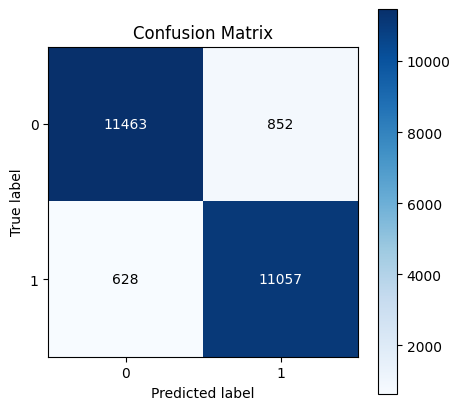

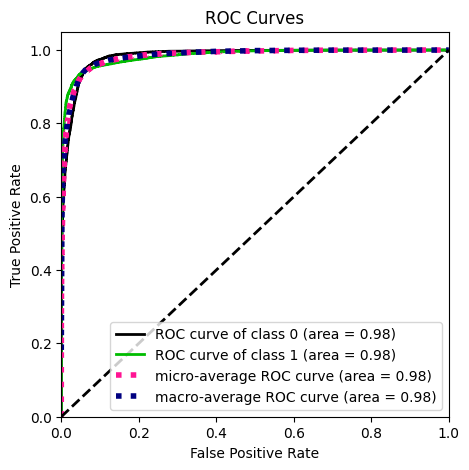

INFO:root:Validation Set Evaluation
INFO:root:Variable(s) of interest ['BOUGHTPASS'] AUC: 0.886    Accuracy: 0.820    Balanced Accuracy: 0.821
INFO:root:Feature Importance df: 
                           COLS     IMP
0                     EVERPASS  0.2654
1         MOSTCOMMONTICKETCOMP  0.0322
2            SUBSEASONSPERYEAR  0.0250
3                          AGE  0.0186
4                  TOTALVISITS  0.0162
5                GUESTBEHAVIOR  0.0126
6                 EVERCOREPASS  0.0120
7            MOSTVISITEDREGION  0.0110
8            AVGVISITPERSEASON  0.0108
9            MOSTVISITEDRESORT  0.0090
10          ISEPICMIXACTIVATED  0.0080
11         TOTALSEASONSSCANNED  0.0076
12  DESTINATIONGEOAFINITYLABEL  0.0074
13           SKIERABILITYLABEL  0.0060
14                  GENDERCODE  0.0058
15        MOSTSUBSEASONVISITED  0.0042
16              RESORTSVISITED  0.0042
17         ONLYSINGLERESORTKEY  0.0022
18             VISITMOSTINPEAK  0.0004
19    PARTNERRESORTSCANNERFLAG  0.0002
20 

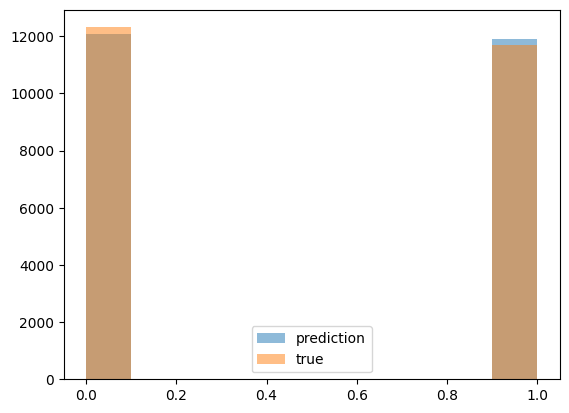

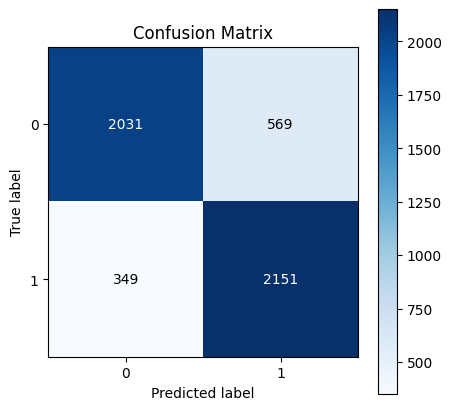

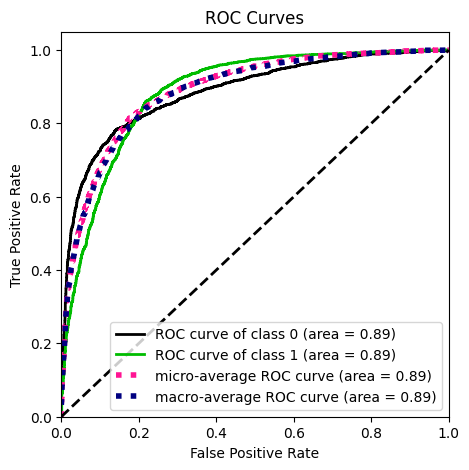

INFO:root:Test Set Evaluation
INFO:root:Variable(s) of interest ['BOUGHTPASS'] AUC: 0.896    Accuracy: 0.824    Balanced Accuracy: 0.825
INFO:root:Feature Importance df: 
                           COLS       IMP
0                     EVERPASS  0.250000
1         MOSTCOMMONTICKETCOMP  0.042222
2                          AGE  0.014444
3            AVGVISITPERSEASON  0.012222
4            SUBSEASONSPERYEAR  0.008889
5                GUESTBEHAVIOR  0.007778
6           ISEPICMIXACTIVATED  0.006667
7                 EVERCOREPASS  0.005556
8               RESORTSVISITED  0.004444
9            MOSTVISITEDRESORT  0.003333
10    PARTNERRESORTSCANNERFLAG  0.002222
11                 TOTALVISITS  0.002222
12             VISITMOSTINPEAK  0.001111
13  DESTINATIONGEOAFINITYLABEL  0.001111
14         ONLYSINGLERESORTKEY  0.000000
15               MARKETINGZONE  0.000000
16                  GENDERCODE -0.001111
17         TOTALSEASONSSCANNED -0.002222
18        MOSTSUBSEASONVISITED -0.003333
19      

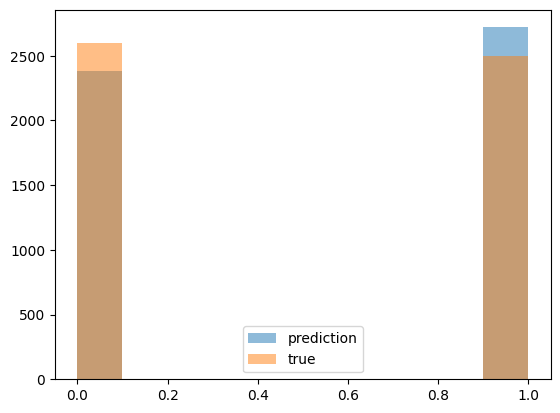

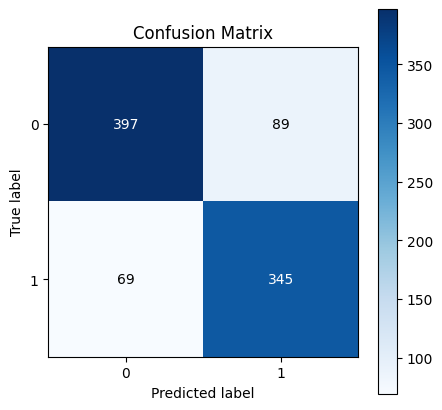

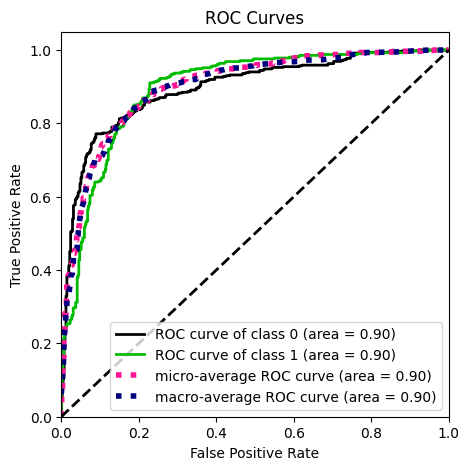

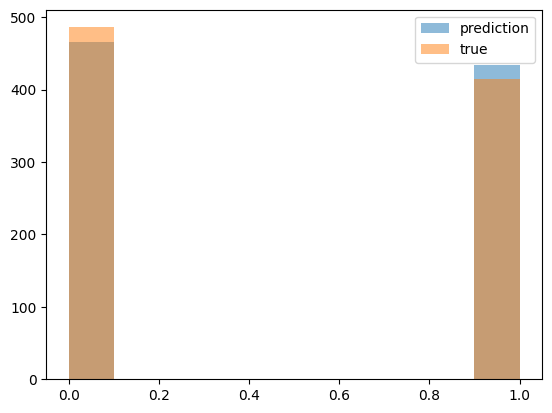

In [ ]:
result_dict = {}
logging.info('Training Set Evaluation')

eval_list_train = evaluate(model, X_train, y_train, y_var, feature_importance=True, plot=True)
metric1, metric2, metric3, columns, _, _, fi_permutation = eval_list_train
result_dict['training_metrics']={k: v for k, v in zip(columns, [metric1]+[metric2]+[metric3])}
result_dict['fi_train']={k:v for k, v in fi_permutation[:10].values}
logging.info('Validation Set Evaluation')
eval_list_valid = evaluate(model, X_valid, y_valid, y_var, feature_importance=True, plot=True)
metric1, metric2, metric3, columns, y_pred_proba, y_pred, fi_permutation = eval_list_train
result_dict['valid_metrics']={k: v for k, v in zip(columns, [metric1]+[metric2]+[metric3])}
result_dict['fi_valid']={k:v for k, v in fi_permutation[:10].values}
if X_test is not None:
    logging.info('Test Set Evaluation')
    eval_list_test = evaluate(model, X_test, y_test, y_var, feature_importance=True, plot=True)
    metric1, metric2, metric3, columns, y_pred_proba, y_pred, fi_permutation = eval_list_test
    result_dict['test_metrics']={k: v for k, v in zip(columns, [metric1]+[metric2]+[metric3])}
    result_dict['fi_test']={k:v for k, v in fi_permutation[:10].values}

# Final Remarks

The number of changes and the future of this type of work is really exciting this is purely a POC of what this walk through right now this is here to help the 2022/23 winter work load to move some of our existing models into a template that we can build on.

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()